## 1. Import Dependencies

In [9]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## 2. Load Model

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')


Using cache found in C:\Users\modib/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-13 Python-3.7.0 torch-1.8.0 CUDA:0 (Quadro M2200, 4096MiB)

100%|█████████████████████████████████████████████████████████████████████████████| 3.87M/3.87M [00:02<00:00, 1.68MB/s]

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


## 3. Make Detections with Images

In [11]:
img ='b3c939e3-61fb6427.jpg'

In [12]:
model.conf = 0.5
results = model(img)
results.print()

image 1/1: 720x1280 5 cars, 1 truck
Speed: 13.6ms pre-process, 63.6ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


**Get The BBOXES from results**

In [13]:
bboxes = results.xyxy[0].tolist()
print(bboxes)

[[799.4191284179688, 331.6531066894531, 1031.4871826171875, 462.1037902832031, 0.8879249691963196, 2.0], [468.56829833984375, 342.5731506347656, 531.368408203125, 379.7084655761719, 0.744292140007019, 2.0], [1128.993408203125, 381.9983825683594, 1279.23291015625, 627.1241455078125, 0.7257730960845947, 2.0], [546.23876953125, 318.11468505859375, 652.3856201171875, 420.1104736328125, 0.6588749289512634, 2.0], [288.0208740234375, 314.14678955078125, 456.6219482421875, 433.86920166015625, 0.5982845425605774, 2.0], [673.6412963867188, 279.4224548339844, 800.2792358398438, 398.1009216308594, 0.519650936126709, 7.0]]


**With Matplotlib**

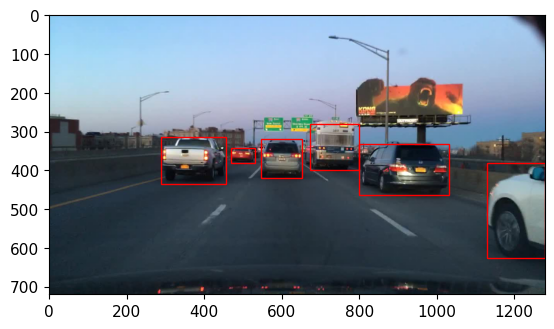

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 

image = plt.imread(img) 
# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(image)

# Loop over the bboxes and draw them on the image
for bbox in bboxes:
    x1, y1, x2, y2,conf,cls = bbox
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Show the image with bboxes
plt.show()

**With Open CV**

In [7]:
# Load the image
image = cv2.imread(img)  
# Convert the image tensor to a numpy array
image = np.array(image)

# Loop over the bboxes and draw them on the image
for bbox in bboxes:
    x1, y1, x2, y2,conf,cls = bbox
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # convert bbox coordinates to integers
    image = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0,255), 1)  # draw bbox on the image

# Display the image with bboxes
cv2.imshow('Image with Bboxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

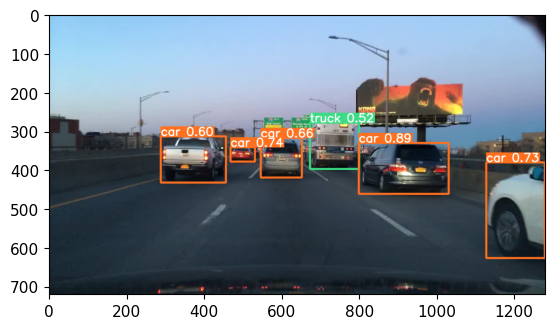

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

## 4. Real Time Detections

In [9]:
cap = cv2.VideoCapture('video11.mp4')
screen_width = 640
screen_height = 480
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.resize(frame, (screen_width, screen_height))
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 5. Train from scratch

In [4]:
#--workers 2  to solve the BrokenPipeError: [ERROR 32] Broken Pipe
!cd yolov5 && python train.py --img 320 --batch 64 --epochs 70 --data dataset.yaml --weights yolov5n.pt --workers 2  

^C


## 6. Load Custom Model and Make Detections with Images, and Videos

In [16]:
# model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5//runs//train//exp//weights//last.pt', force_reload=True)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='last.pt', force_reload=True)

model.conf = 0.2

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\modib/.cache\torch\hub\master.zip
YOLOv5  2023-4-13 Python-3.7.0 torch-1.8.0 CUDA:0 (Quadro M2200, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


In [17]:
import os
# img = os.path.join('datasets', 'val', 'images','b1d9e136-9ab25cb3.jpg')  #datasets\val\images
img ='b3c939e3-61fb6427.jpg'

In [18]:
results = model(img)

In [19]:
results.print()

image 1/1: 720x1280 8 cars, 1 bus, 3 trucks
Speed: 11.8ms pre-process, 57.0ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


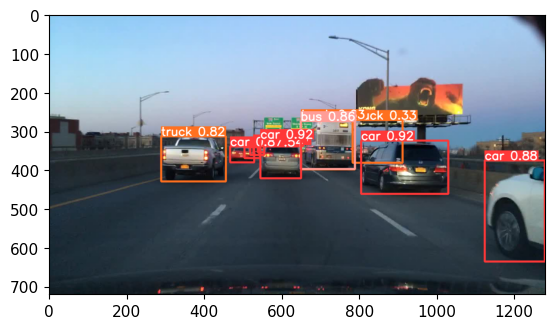

In [20]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [21]:
cap = cv2.VideoCapture('video11.mp4')
screen_width = 640
screen_height = 480
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.resize(frame, (screen_width, screen_height))
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()